In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# Introduction to AI and OpenVino
## Session 10a:


## Working with Tensorflow 
- One hidden layer
- Make_moon

</p><img src='../../prasami_images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>

In [2]:
# Lets import some libraries
import os

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn import datasets

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler

import tensorflow as tf

%matplotlib inline

2024-06-14 09:22:19.673103: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-14 09:22:19.673253: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-14 09:22:19.702194: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-14 09:22:19.771250: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-14 09:22:21.442220: W tensorflow/compiler/tf2

In [3]:
# Some basic parameters

inpDir = '../../input' # location where input data is stored
outDir = '../output' # location to store outputs
modelDir = '../models'
subDir = 'make_moon'

RANDOM_STATE = 24 # for initialization ----- REMEMBER: to remove at the time of promotion to production

np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
tf.random.set_seed(RANDOM_STATE) # setting for Tensorflow as well


EPOCHS = 100 # number of epochs
ALPHA = 0.01 # learning rate

BATCH_SIZE = 256 # other sizes leave last batch partial
NUM_SAMPLE = 1280
NOISE = 0.2
TEST_SIZE = 0.2

# Set parameters for decoration of plots
params = {'legend.fontsize' : 'large',
          'figure.figsize'  : (15,15),
          'axes.labelsize'  : 'x-large',
          'axes.titlesize'  :'x-large',
          'xtick.labelsize' :'large',
          'ytick.labelsize' :'large',
         }

CMAP = plt.cm.brg

plt.rcParams.update(params) # update rcParams

### Settings so that Tensorflow can not Hog all the GPU memory

In [4]:
physical_devices = tf.config.list_physical_devices('GPU') 

if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

2024-06-14 09:22:24.360620: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-14 09:22:24.506840: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-14 09:22:24.507367: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

## Load make_moon

In [5]:
X, y = datasets.make_moons(n_samples=NUM_SAMPLE, noise=NOISE, random_state=RANDOM_STATE)
X.shape, y.shape

((1280, 2), (1280,))

In [6]:
#  Split the data in training and test sets to measure performance of the model.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=TEST_SIZE,
                                                    stratify=y,
                                                    random_state=RANDOM_STATE )

print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1024, 2) (1024,) (256, 2) (256,)


In [7]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [8]:
X_train.shape

(1024, 2)

## Prepare model

Build the `tf.keras.Sequential` model by stacking layers from `tf.keras.layers.Dense`. Activations can be given as string or from `tf.keras.activations.tanh` 

In [9]:
# Callig class Sequential and pass all layers as a list

model = tf.keras.Sequential([

    tf.keras.layers.Dense(4, activation='tanh'), # alternatively activation = tf.keras.activations.tanh

  
    tf.keras.layers.Dense(2) # notice absence of softmax function

])

2024-06-14 09:22:24.616577: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-14 09:22:24.616932: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-14 09:22:24.617195: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

## Reference
<p style="font-family: Arial; font-size:1.2em;">
Details of <a href = "https://www.tensorflow.org/api_docs/python/tf/keras/Sequential">Sequential Model</a>. Sequential provides training and predict features on this model.
</p>

### Functional API

<p style="font-family: Arial; font-size:1.2em;">You can also instantiate a Model with the <strong>"Functional API"</strong>, where you start from Input, you chain layer calls to specify the model's forward pass, and finally you create your model from inputs and outputs:

>import tensorflow as tf

>inputs = tf.keras.Input(shape=(2,))
    
>x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)

>outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)

>model = tf.keras.Model(inputs=inputs, outputs=outputs)

    
<p style="font-family: Arial; font-size:1.2em;">You can also extend the model class, if love to live by sword!!
</p>

<p style="font-family: Arial; font-size:1.2em;">
    For each example the model returns a vector of "logits" or "log-odds" scores, one for each class.
</p>

In [10]:
X_train[:1].shape

(1, 2)

In [11]:
predictions = model(X_train[:1]).numpy()
predictions

array([[ 0.95190144, -0.31157964]], dtype=float32)

In [12]:
predictions.sum()

0.6403218

The `tf.nn.softmax` function converts these logits to "probabilities" for each class: 

In [13]:
tf.nn.softmax(predictions).numpy()

array([[0.77962476, 0.2203752 ]], dtype=float32)

In [14]:
tf.nn.softmax(predictions).numpy().sum()

0.99999994

In [15]:
'''
Number of parameters:
    layer 1 : 2*4 +4 = 12 
    layer 2 : 4*4 + 2 = 10
We are not locking any layer hence all parameter are trainable    
'''

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 4)                    12        
                                                                 
 dense_1 (Dense)             (1, 2)                    10        
                                                                 
Total params: 22 (88.00 Byte)
Trainable params: 22 (88.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Game Changer

`Softmax` function is prone to two issues: overflow and underflow.

- <b>Overflow</b> occurs when very large numbers are being fed.
- <b>Underflow</b> occurs when very small numbers (near zero) are being fed.

There are work arounds too, but, TF has its own approach.<br>
    
Intuition being that every system (32 / 64 bit precision) has limits in terms of largest or smallest value it can accurately process.

It also leads to the vanishing gradient in exponential functions. As you go higher/lower it  will overflow and the gradient will be `zero` irrespective of actually it being a `non-zero`.

## Lose Function

Our loss function is crossentropy as there are two or more label classes. The labels are provided using one-hot representation. We will use CategoricalCrossentropy loss. 
    
>y_true = [ 0, 2 ] <b>Sparse Representation</b><br>
>y_true = [ [1      0    0], [ 0    0   1 ] <b>Dense Representation</b><br>
>y_pred = [ [0.05, 0.95, 0], [0.1, 0.1, 0.8] ]


In case, you have not one-hot-encoded use `losses.SparseCategoricalCrossentropy`. It takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [16]:
import sys
sys.float_info.max

1.7976931348623157e+308

In [17]:
sys.float_info.min

2.2250738585072014e-308

In [18]:
np.log(sys.float_info.max)

709.782712893384

In [19]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy ( from_logits = True)

In [20]:
y_train[:1]

array([0])

In [21]:
loss_fn(y_train[:1], predictions).numpy()

0.24894255

Using `model.compile`, specify the training configuration such as:
- Loss function to minimize
- Optimizer
- List of metrics to monitor

In [22]:
model.compile(optimizer='SGD',
              loss=loss_fn,
              metrics=['accuracy'])

Call `fit()`, which will train the model by slicing the data into `batches` of size `batch_size`, and repeatedly iterating over the entire dataset for a given number of `epochs`. Pass some validation for monitoring validation loss and metrics at the end of each epoch.

In [23]:
history = model.fit(X_train, y_train, 
                    validation_data=[X_test, y_test],
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS)

Epoch 1/100


2024-06-14 09:22:25.611922: I external/local_xla/xla/service/service.cc:168] XLA service 0x7c48de0be2c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-14 09:22:25.611969: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-06-14 09:22:25.639603: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902


1/4 [======>.......................] - ETA: 2s - loss: 0.5179 - accuracy: 0.6992

I0000 00:00:1718337145.819046    5242 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 [==============================] - 1s 60ms/step - loss: 0.4898 - accuracy: 0.7354 - val_loss: 0.4528 - val_accuracy: 0.7930
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 0.4859 - accuracy: 0.7393 - val_loss: 0.4483 - val_accuracy: 0.7969
Epoch 3/100
4/4 [==============================] - 0s 14ms/step - loss: 0.4820 - accuracy: 0.7461 - val_loss: 0.4439 - val_accuracy: 0.8047
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.4783 - accuracy: 0.7500 - val_loss: 0.4396 - val_accuracy: 0.8047
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 0.4747 - accuracy: 0.7520 - val_loss: 0.4354 - val_accuracy: 0.8047
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 0.4711 - accuracy: 0.7559 - val_loss: 0.4314 - val_accuracy: 0.8047
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - loss: 0.4677 - accuracy: 0.7598 - val_loss: 0.4274 - val_accuracy: 0.8125
Epoch 8/100
4/4 [===============

In case we want to separately evaluate this model, we have `evaluate` function.

In [24]:
model.evaluate ( X_test,  y_test, verbose=2)

8/8 - 0s - loss: 0.2834 - accuracy: 0.8867 - 127ms/epoch - 16ms/step


[0.28343576192855835, 0.88671875]

In [25]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.489843,0.735352,0.452846,0.792969
1,0.485866,0.739258,0.448290,0.796875
2,0.482012,0.746094,0.443868,0.804688
3,0.478282,0.750000,0.439574,0.804688
4,0.474685,0.751953,0.435403,0.804688


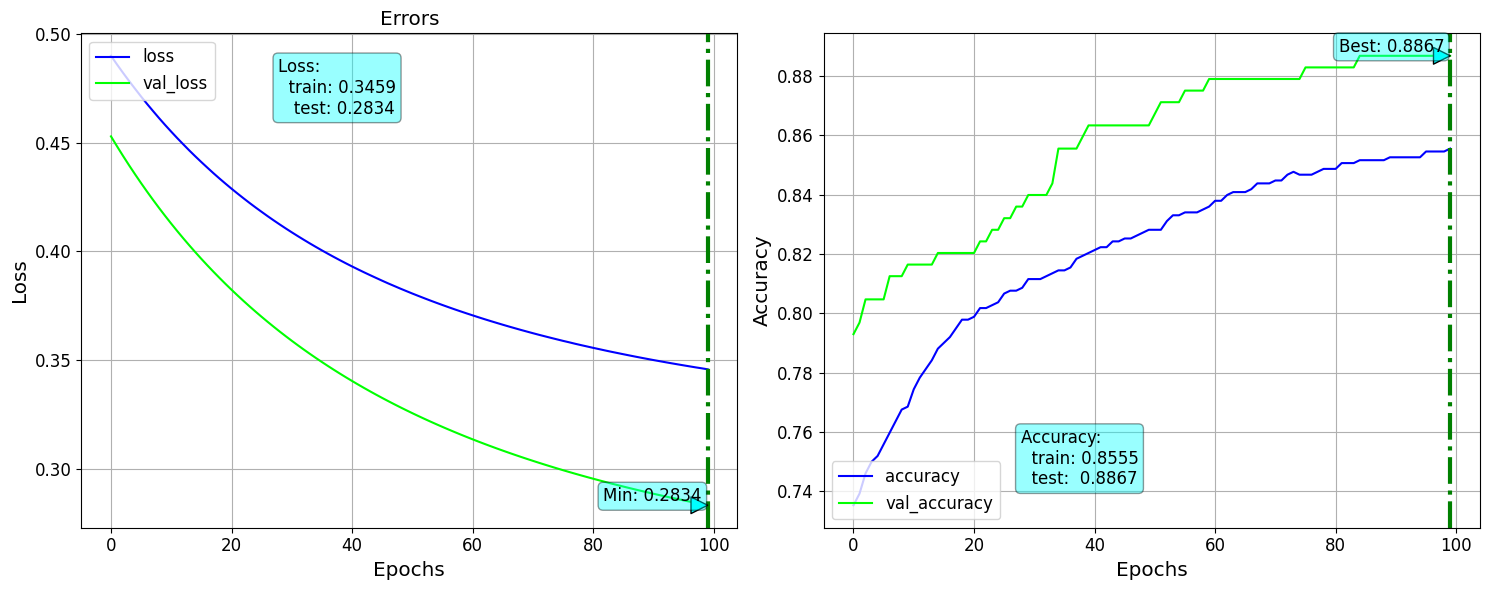

In [26]:
fig, axes = plt.subplots(1,2 , figsize = (15,6))

# properties  matplotlib.patch.Patch 
props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)
facecolor = 'cyan'
fontsize=12

# Get columns by index to eliminate any column naming error
y1 = hist_df.columns[0]
y2 = hist_df.columns[1]
y3 = hist_df.columns[2]
y4 = hist_df.columns[3]

# Where was min loss
best = hist_df[hist_df[y3] == hist_df[y3].min()]

ax = axes[0]

hist_df.plot(y = [y1,y3], ax = ax, colormap=CMAP)


# little beautification
txtFmt = "Loss: \n  train: {:6.4f}\n   test: {:6.4f}"
txtstr = txtFmt.format(hist_df.iloc[-1][y1],
                       hist_df.iloc[-1][y3]) #text to plot

# place a text box in upper middle in axes coords
ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=fontsize,
        verticalalignment='top', bbox=props)

# Mark arrow at lowest
ax.annotate(f'Min: {best[y3].to_numpy()[0]:6.4f}', # text to print
            xy=(best.index.to_numpy(), best[y3].to_numpy()[0]), # Arrow start
            xytext=(best.index.to_numpy()-1, best[y3].to_numpy()[0]), # location of text 
            fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
            arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow

# Draw vertical line at best value
ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

ax.set_xlabel("Epochs")
ax.set_ylabel(y1.capitalize())
ax.set_title('Errors')
ax.grid();
ax.legend(loc = 'upper left') # model legend to upper left

ax = axes[1]

hist_df.plot( y = [y2, y4], ax = ax, colormap=CMAP)

# little beautification
txtFmt = "Accuracy: \n  train: {:6.4f}\n  test:  {:6.4f}"
txtstr = txtFmt.format(hist_df.iloc[-1][y2],
                       hist_df.iloc[-1][y4]) #text to plot

# place a text box in upper middle in axes coords
ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=fontsize,
        verticalalignment='top', bbox=props)

# Mark arrow at lowest
ax.annotate(f'Best: {best[y4].to_numpy()[0]:6.4f}', # text to print
            xy=(best.index.to_numpy(), best[y4].to_numpy()[0]), # Arrow start
            xytext=(best.index.to_numpy()-1, best[y4].to_numpy()[0]), # location of text 
            fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
            arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow


# Draw vertical line at best value
ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

ax.set_xlabel("Epochs")
ax.set_ylabel(y2.capitalize())
ax.grid()
ax.legend(loc = 'lower left')

plt.tight_layout()

## Predictions

In [27]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [28]:
y_pred = probability_model(X_train).numpy()
y_pred

array([[0.8781633 , 0.12183671],
       [0.9005862 , 0.09941385],
       [0.10654373, 0.8934562 ],
       ...,
       [0.9188927 , 0.0811073 ],
       [0.90598553, 0.09401443],
       [0.890433  , 0.10956702]], dtype=float32)

In [29]:
print(classification_report(y_train, np.argmax(y_pred, axis = 1)))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       512
           1       0.85      0.86      0.86       512

    accuracy                           0.86      1024
   macro avg       0.86      0.86      0.86      1024
weighted avg       0.86      0.86      0.86      1024



In [30]:
y_pred = probability_model(X_test).numpy()

print('Accuracy score on Test Data :{:.5f}'.format(accuracy_score(y_test, 
                                                                  np.argmax(y_pred, axis = 1))))

Accuracy score on Test Data :0.88672


In [31]:
print(classification_report(y_test, 
                            np.argmax(y_pred, axis = 1)))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       128
           1       0.92      0.85      0.88       128

    accuracy                           0.89       256
   macro avg       0.89      0.89      0.89       256
weighted avg       0.89      0.89      0.89       256



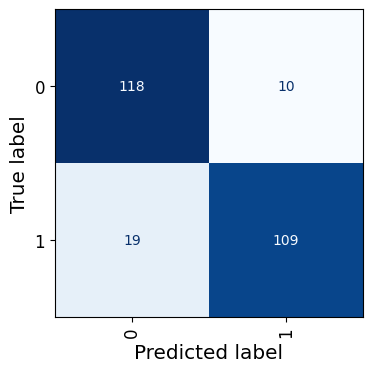

In [32]:
cm  = confusion_matrix(y_test, np.argmax(y_pred, axis = 1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])

fig, ax = plt.subplots(figsize = (4,4))

disp.plot(ax = ax, cmap = 'Blues', xticks_rotation = 'vertical', colorbar=False)

plt.show();

In [33]:
hist_df[hist_df['val_loss'] == hist_df['val_loss'].min()]

,loss,accuracy,val_loss,val_accuracy
99,0.345868,0.855469,0.283436,0.886719
